In [1]:
!pip install --upgrade geopandas -q
!pip install --upgrade pyshp -q
!pip install --upgrade shapely -q
!pip install --upgrade descartes -q

     |████████████████████████████████| 1.0MB 14.2MB/s 
     |████████████████████████████████| 15.4MB 277kB/s 
     |████████████████████████████████| 6.6MB 47.3MB/s 
     |████████████████████████████████| 225kB 12.9MB/s 


In [2]:
import requests
import zipfile

In [35]:
import geopandas as gpd
import folium

In [4]:
url = "https://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=CD02C824-45C5-48C8-B631-98B205A2E35A"

In [5]:
r = requests.get(url)

In [6]:
with open("data.zip","wb") as f:
  f.write(r.content)

In [7]:
with zipfile.ZipFile("data.zip","r") as zf:
    zf.extractall()

In [8]:
gdf = gpd.read_file("TOWN_MOI_1100415.shp", encoding="utf-8")

In [9]:
gdf.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


In [48]:
kh_gdf = gdf[gdf['COUNTYNAME']=="高雄市"]
kh_json = kh_gdf.to_json()

In [44]:
kh_gdf.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
150,A02,63000030,臺北市,大安區,Da'an District,A,63000,"POLYGON ((121.54384 25.04491, 121.54407 25.044..."
151,A11,63000080,臺北市,文山區,Wenshan District,A,63000,"POLYGON ((121.59725 25.01439, 121.59724 25.014..."
331,A17,63000020,臺北市,信義區,Xinyi District,A,63000,"POLYGON ((121.57995 25.04950, 121.57996 25.049..."
332,A05,63000070,臺北市,萬華區,Wanhua District,A,63000,"POLYGON ((121.50521 25.04949, 121.50554 25.049..."
333,A03,63000050,臺北市,中正區,Zhongzheng District,A,63000,"POLYGON ((121.51341 25.04940, 121.51375 25.049..."


(22.4, 23.6)

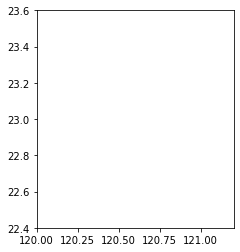

In [45]:
ax = kh_gdf.plot(cmap="Blues")
ax.set_xlim(120, 121.2)
ax.set_ylim(22.4, 23.6)

臺東縣 成功鎮


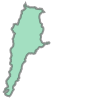

In [27]:
n = 0
print(gdf['COUNTYNAME'][n],gdf['TOWNNAME'][n])
gdf.iloc[n]['geometry']

In [53]:
m = folium.Map(location=[22.6273, 120.3014], zoom_start=11)
kh = folium.GeoJson(kh_json, name="高雄市行政區")
kh.add_to(m)
folium.LayerControl().add_to(m)

In [54]:
m

In [33]:
for i, p in kh_gdf.centroid.items():
  folium.Marker([p.y, p.x], popup=kh_gdf['TOWNNAME'][i]).add_to(m)

m.save("map.html")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
